### Dependencies

In [1]:
!pip install matplotlib tensorflow tensorflow-gpu tensorflow-io

  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached tensorflow_estimator-2.9.0-py2.py3-none-any.whl (438 kB)
  Using cached keras-2.9.0-py2.py3-none-any.whl (1.6 MB)
  Using cached tensorboard-2.9.0-py3-none-any.whl (5.8 MB)
  Using cached flatbuffers-1.12-py2.py3-none-any.whl (15 kB)
  Attempting uninstall: tensorflow-io-gcs-filesystem
    Found existing installation: tensorflow-io-gcs-filesystem 0.25.0
    Uninstalling tensorflow-io-gcs-filesystem-0.25.0:
      Successfully uninstalled tensorflow-io-gcs-filesystem-0.25.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Successfully uninstalled gas

In [1]:
import os
from matplotlib import pyplot as plt
import tensorflow as tf
import tensorflow_io as tfio

### Data Loading

In [2]:
CAPUCHIN_FILE= os.path.join('data', 'Parsed_Capuchinbird_Clips', 'XC3776-3.wav')
NOT_CAPUCHIN_FILE= os.path.join('data', 'Parsed_Not_Capuchinbird_Clips', 'afternoon-birds-song-in-forest-0.wav')

In [3]:
file_contents= tf.io.read_file(CAPUCHIN_FILE)

In [4]:
wav, sample_rate= tf.audio.decode_wav(file_contents, desired_channels= 1)

In [5]:
wav

<tf.Tensor: shape=(132300, 1), dtype=float32, numpy=
array([[-0.11117554],
       [-0.0378418 ],
       [ 0.05856323],
       ...,
       [-0.01077271],
       [-0.03436279],
       [-0.04879761]], dtype=float32)>

In [6]:
sample_rate

<tf.Tensor: shape=(), dtype=int32, numpy=44100>

In [7]:
def load_wav_16k_mono(filename):
    file_contents= tf.io.read_file(filename)
    
    wav, sample_rate= tf.audio.decode_wav(file_contents, desired_channels= 1)
    wav= tf.squeeze(wav, axis= -1)
    sample_rate= tf.cast(sample_rate, dtype=tf.int64)
    
    wav= tfio.audio.resample(wav, rate_in= sample_rate, rate_out= 16000)
    
    return wav

In [8]:
wave= load_wav_16k_mono(CAPUCHIN_FILE)
nwave= load_wav_16k_mono(NOT_CAPUCHIN_FILE)

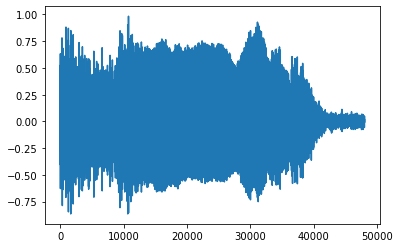

In [9]:
plt.plot(wave)
plt.show()

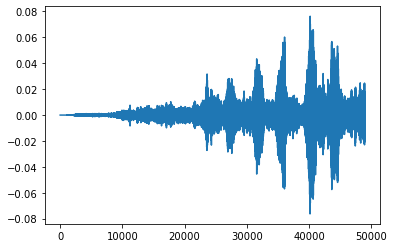

In [10]:
plt.plot(nwave)
plt.show()

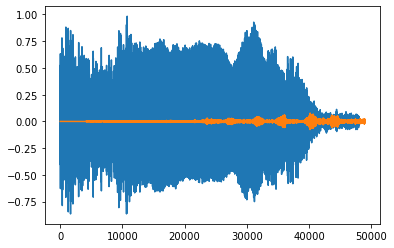

In [11]:
plt.plot(wave)
plt.plot(nwave)
plt.show()

In [12]:
POS= os.path.join('data', 'Parsed_Capuchinbird_Clips')
NEG= os.path.join('data', 'Parsed_Not_Capuchinbird_Clips')

In [13]:
pos= tf.data.Dataset.list_files(POS+'\*.wav')
neg= tf.data.Dataset.list_files(NEG+'\*.wav')

In [14]:
len(pos), len(neg)


(217, 593)

In [15]:
tf.ones(len(pos))

<tf.Tensor: shape=(217,), dtype=float32, numpy=
array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1

In [16]:
tf.zeros(len(neg))

<tf.Tensor: shape=(593,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0

In [17]:
pos.as_numpy_iterator().next()

b'data\\Parsed_Capuchinbird_Clips\\XC16804-1.wav'

In [18]:
positives= tf.data.Dataset.zip((pos, tf.data.Dataset.from_tensor_slices(tf.ones(len(pos)))))
negatives= tf.data.Dataset.zip((neg, tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg)))))

data= positives.concatenate(negatives)

In [19]:
data.shuffle(10000).as_numpy_iterator().next()

(b'data\\Parsed_Not_Capuchinbird_Clips\\cricket-sounds-for-sleep-11.wav', 0.0)

In [20]:
lengths= []
for file in os.listdir(os.path.join('data', 'Parsed_Capuchinbird_Clips')):
    tensor_wave= load_wav_16k_mono(os.path.join('data', 'Parsed_Capuchinbird_Clips', file))
    lengths.append(len(tensor_wave))


In [21]:
lengths[:10]

[40000, 48000, 56000, 48000, 56000, 64000, 64000, 64000, 56000, 56000]

In [22]:
mean= tf.math.reduce_mean(lengths)
min= tf.math.reduce_min(lengths)
max= tf.math.reduce_max(lengths)

In [23]:
mean, min, max

(<tf.Tensor: shape=(), dtype=int32, numpy=54156>,
 <tf.Tensor: shape=(), dtype=int32, numpy=32000>,
 <tf.Tensor: shape=(), dtype=int32, numpy=80000>)

In [30]:
def preprocess(file_path, label):
    wav= load_wav_16k_mono(file_path)
    wav= wav[:48000]
    zero_padding= tf.zeros([48000]- tf.shape(wav), dtype= tf.float32)
    wav= tf.concat([zero_padding, wav], 0)
    
    spectrogram= tf.signal.stft(wav, frame_length= 320, frame_step= 32)
    spectrogram= tf.abs(spectrogram)
    spectrogram= tf.expand_dims(spectrogram, axis= 2)
    
    return spectrogram, label

In [31]:
file_path, label= positives.shuffle(buffer_size= 10000).as_numpy_iterator().next()

In [32]:
spectrogram, label= preprocess(file_path, label)

In [33]:
spectrogram

<tf.Tensor: shape=(1491, 257, 1), dtype=float32, numpy=
array([[[5.5812523e-03],
        [1.0109319e-02],
        [7.4061994e-03],
        ...,
        [1.6042764e-05],
        [1.8707598e-05],
        [8.5011125e-06]],

       [[6.3755363e-04],
        [2.5489653e-04],
        [7.6366501e-04],
        ...,
        [1.3451354e-05],
        [1.2860991e-05],
        [1.6607344e-05]],

       [[1.8771067e-03],
        [1.2868884e-03],
        [1.1044585e-03],
        ...,
        [9.7025950e-06],
        [7.3084780e-06],
        [4.7460198e-06]],

       ...,

       [[5.1854178e-05],
        [9.2499446e-05],
        [8.8969209e-05],
        ...,
        [1.0814985e-05],
        [4.5479414e-06],
        [2.0246953e-06]],

       [[2.1910295e-05],
        [7.9069105e-05],
        [1.1343162e-04],
        ...,
        [9.2567898e-06],
        [7.4762124e-06],
        [5.6568533e-06]],

       [[4.7530979e-05],
        [8.6761036e-05],
        [1.1056882e-04],
        ...,
        [1.5887124

In [34]:
label

1.0

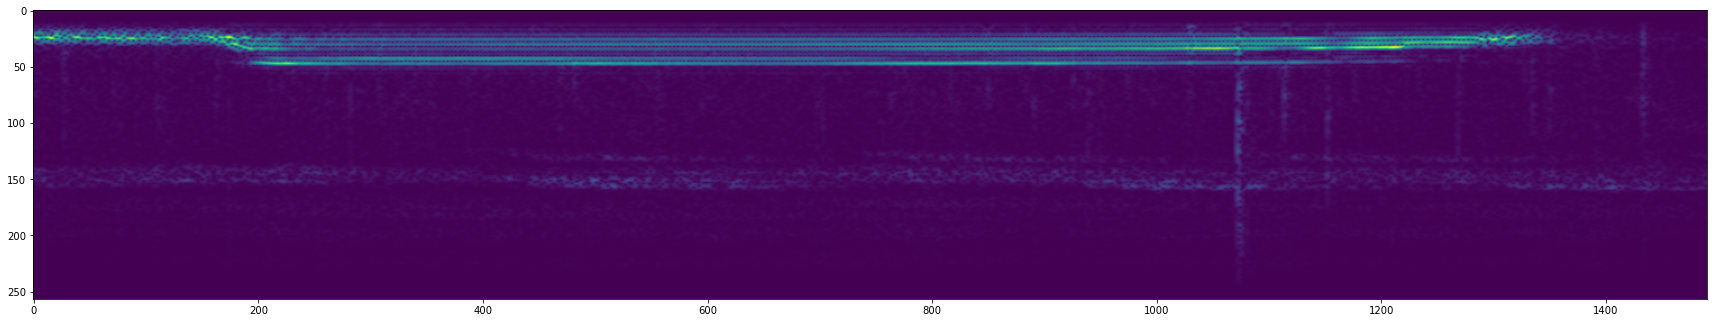

In [35]:
plt.figure(figsize= (30, 20))
plt.imshow(tf.transpose(spectrogram)[0])
plt.show()

In [36]:
data= data.map(preprocess)
data= data.cache()
data= data.shuffle(buffer_size= 1000)
data= data.batch(16)
data= data.prefetch(8)

In [37]:
len(data)

51

In [38]:
train= data.take(36)
test= data.skip(36).take(15)

In [39]:
samples, labels= train.as_numpy_iterator().next()
samples.shape

(16, 1491, 257, 1)

In [40]:
labels

array([0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten

In [2]:
model= Sequential()
model.add(Conv2D(16, (3, 3), activation= 'relu', input_shape= (1491, 257, 1)))
model.add(Conv2D(16, (3, 3), activation= 'relu'))
model.add(Flatten())
model.add(Dense(128, activation= 'relu'))
model.add(Dense(1, activation= 'sigmoid'))

NameError: name 'Sequential' is not defined